## Feature Scaler - MinMaxScaler

### Import the relevant libraries to use

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the data into dataframe

In [5]:
# Read training features into X_train
X_train=pd.read_csv('data/X_train.csv')
# Read training target into Y_train
Y_train=pd.read_csv('data/Y_train.csv')

# Read testing features into X_test
X_test=pd.read_csv('data/X_test.csv')
# Read testing target into Y_test
Y_test=pd.read_csv('data/Y_test.csv')

# Display the top 5 rows
print(X_train.head())

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001032   Male      No          0  Graduate            No   
1  LP001824   Male     Yes          1  Graduate            No   
2  LP002928   Male     Yes          0  Graduate            No   
3  LP001814   Male     Yes          2  Graduate            No   
4  LP002244   Male     Yes          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4950                0.0         125               360   
1             2882             1843.0         123               480   
2             3000             3416.0          56               180   
3             9703                0.0         112               360   
4             2333             2417.0         136               360   

   Credit_History Property_Area  
0               1         Urban  
1               1     Semiurban  
2               1     Semiurban  
3               1         Urban  
4           

In [6]:
Y_train.head()

,Target
0,Y
1,Y
2,Y
3,Y
4,Y


In [7]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(384, 12) (96, 12) (384, 1) (96, 1)


array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

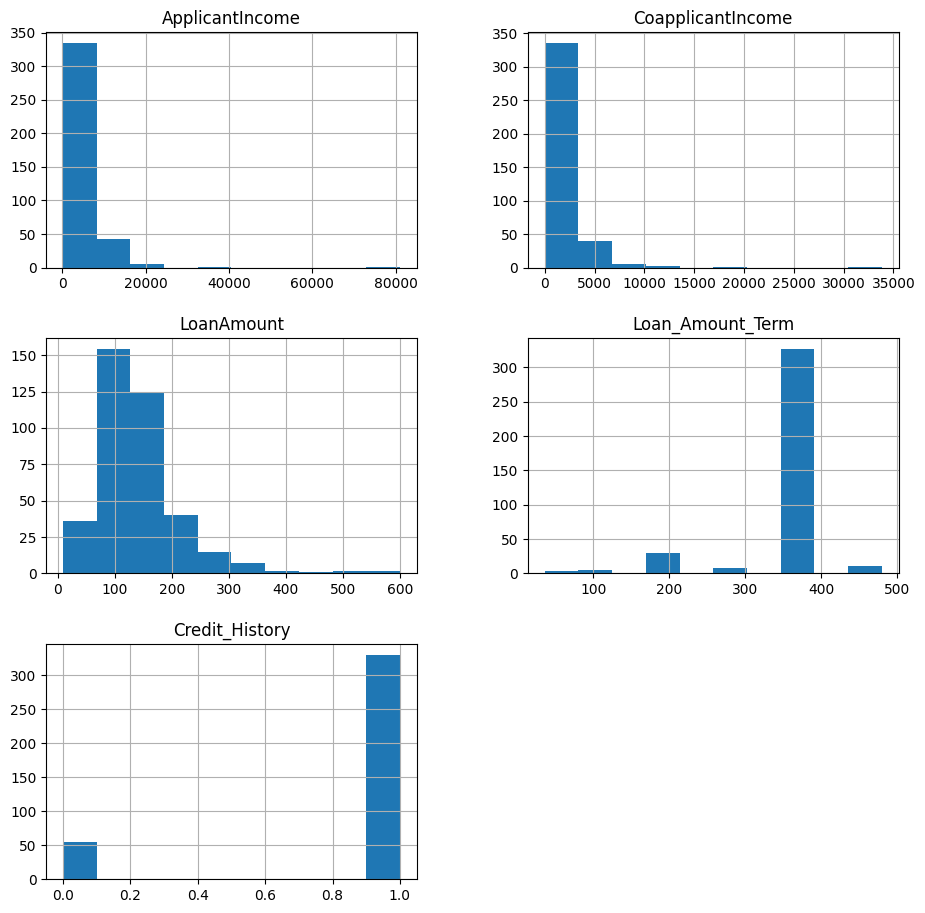

In [8]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
             .index.values].hist(figsize=[11,11])

### Import MinMaxScaler, KNN classifier and Accuracy Score

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Initialize the MinMaxScaler

In [10]:
min_max=MinMaxScaler()

### Scaling down both train and test data set

In [11]:
X_train_minmax=min_max.fit_transform(X_train[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
X_test_minmax=min_max.fit_transform(X_test[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

### Create a KNN Model with 5 neighbors

In [12]:
knn=KNeighborsClassifier(n_neighbors=5)

### Fit the model

In [13]:
knn.fit(X_train_minmax,Y_train)

c:\Users\derri\OneDrive\Documents\gbc\Machin-Learning-I\env\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### Checking the model's accuracy

In [14]:
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.75

## Try applying the same MinMaxScaler to Logistic Regression 
- 1. Import necessary libraries
- 2. Create Logistic Regression Model
- 3. Train the model
- 4. Check accuracy of this model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train_minmax,Y_train)

c:\Users\derri\OneDrive\Documents\gbc\Machin-Learning-I\env\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
model.predict(X_test_minmax)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [20]:
accuracy_score(Y_test,model.predict(X_test_minmax))

0.75

### Which one has better accuracy?

In [ ]:
# Same acuracy